In [1]:
import numpy as np
import random
from decimal import Decimal
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
def coefficients(N):
    coefs = np.random.normal(random.uniform(-1, 1), random.uniform(0.1, 4), N - 1)
    return coefs

def generate_info(N=2, size=1000):
    coefs = coefficients(N)
    
    X_1 = np.random.uniform(-10, 10, (size, N - 1))
    Y_1 = X_1.dot(coefs) + 1 + np.random.normal(0, 1, size)
    O_1 = np.ones(size, dtype=int)
    data_1 = np.column_stack((X_1, Y_1))
    
    X_2 = np.random.uniform(-10, 10, (size, N - 1))
    Y_2 = X_2.dot(coefs) - 1 + np.random.normal(0, 1, size)
    O_2 = (-1) * np.ones(size, dtype=int)
    data_2 = np.column_stack((X_2, Y_2))
    
    data = np.row_stack((data_1, data_2))
    labels = np.hstack((O_1, O_2))
    
    return (data, labels)

In [3]:
class LogRegression:
    
    def __init__(self, C=1):
        self.C = C
    
    def fit(self, x_train, y_train):
        w = np.ones(x_train.shape[1])
        self.n = x_train.shape[0]
        
        k = 1
        error = 0.5
        counter = 0
        
        while error > 0.000001:
            new_w = w - k * self.get_grad(w, x_train[counter], y_train[counter])
            error = np.linalg.norm(new_w - w)
            w = new_w
            counter += 1
            
            if counter == len(x_train):
                counter = 0
                k /= 2
                
                indexes = list(range(len(x_train)))
                np.random.shuffle(indexes)
                x_train[:] = x_train[indexes]
                y_train[:] = y_train[indexes]
                
        self.w = w
        
    def score(self, x_test, y_test):
        
        predict = np.array(list(map(lambda x: 1 if x >= 0 else -1, np.dot(x_test, self.w))))
        res = sum([predict[i] == y_test[i] for i in range(predict.shape[0])])
        
        return res / predict.shape[0]
        
        
    def get_grad(self, w, x_params, y_label):
        base = Decimal(-y_label * self.scalar_multipl(w, x_params)).exp()
        grad = float(base / (1 + base)) * (-y_label) * x_params + 2 * w / self.n
        return grad
        
    def scalar_multipl(self, w, x):
        return np.dot(w, x)

In [4]:
data, labels = generate_info(size=500)
X = np.column_stack((data, np.ones(len(data), dtype=float)))
colors = {1:'r', -1:'b'}

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, labels, train_size=0.7)

In [6]:
clf = LogRegression(C=1)
clf.fit(x_train, y_train)

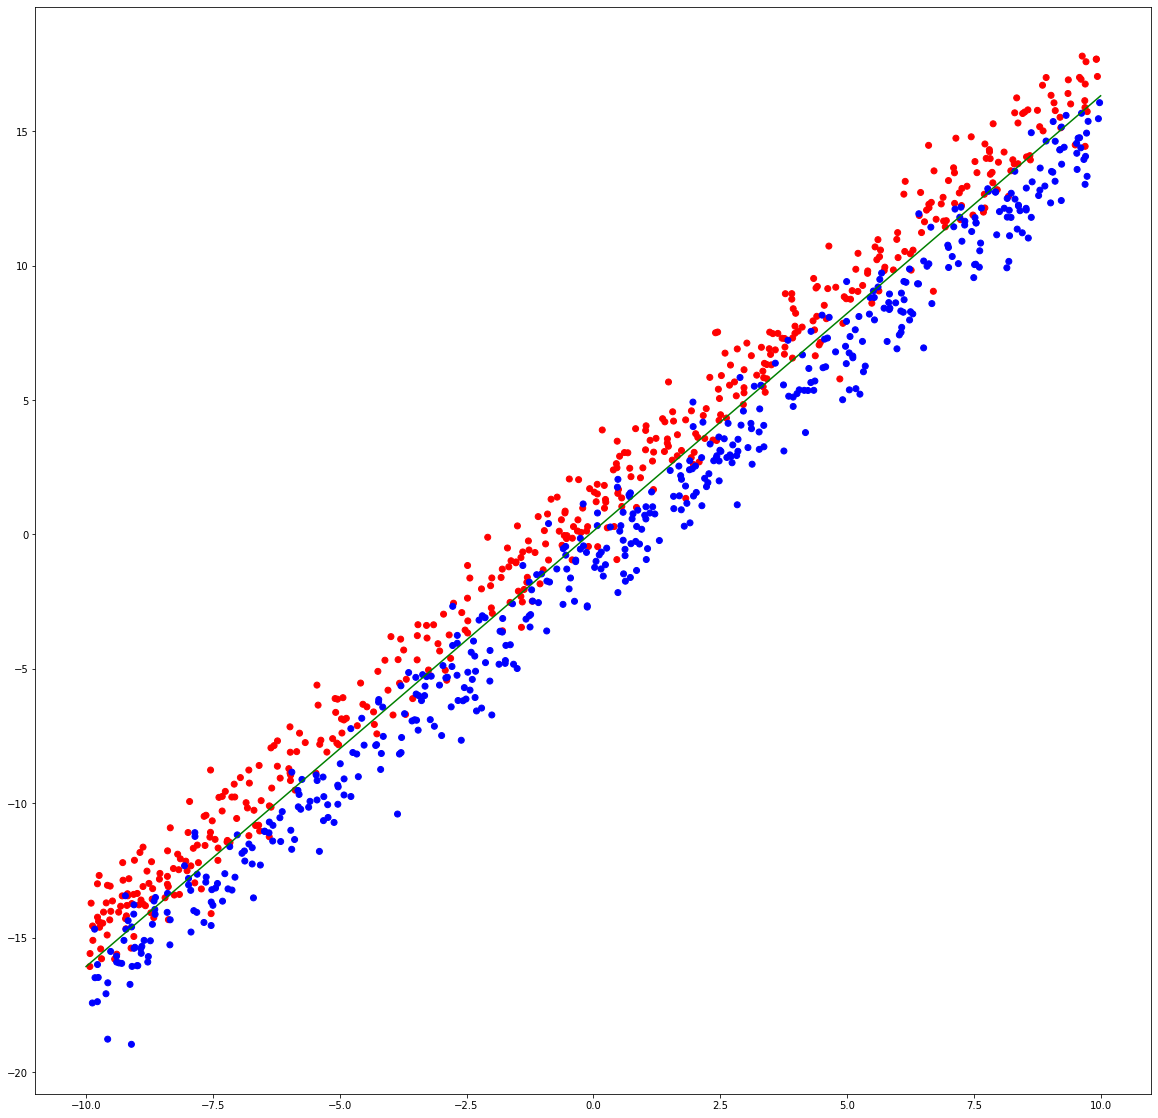

In [7]:
x_axis = np.linspace(-10, 10, 100)
y_axis = - clf.w[0] / clf.w[1] * x_axis - clf.w[2] / clf.w[1]

plt.figure(figsize=(20, 20))
plt.scatter(data[:, 0], data[:, 1], color=[colors[i] for i in labels])
plt.plot(x_axis, y_axis, color='g')
plt.show()

In [8]:
skl_clf = LogisticRegression(solver='lbfgs',random_state=1)
skl_clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
print('Sklearn Accuracy: {:.5f}'.format(skl_clf.score(x_test, y_test)))
print('My LogRegr Accuracy: {:.5f}'.format(clf.score(x_test, y_test)))

Sklearn Accuracy: 0.83667
My LogRegr Accuracy: 0.84333
